***Importing required libraries***

In [0]:
import pandas as pd
from google.colab import files

***Import dataset and print it.***

In [2]:
uploaded = files.upload()

Saving Position_Salaries.csv to Position_Salaries.csv


In [4]:
import io

dataset = pd.read_csv(io.StringIO(uploaded['Position_Salaries.csv'].decode('utf-8')))
x = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

print(dataset)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


***No splitting needed as we need instances of different level of employees to predict salary of incoming employe.***

# ***Building the model***

***For polynomial regression we need ploynomial features***

In [0]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 3)
x_poly = poly_features.fit_transform(x)
# x_poly is polynomial features

***Now fitting x_poly to the model***

In [0]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor = regressor.fit(x_poly , y)

***Model is ready.***

# ***Visualizing the dataset***

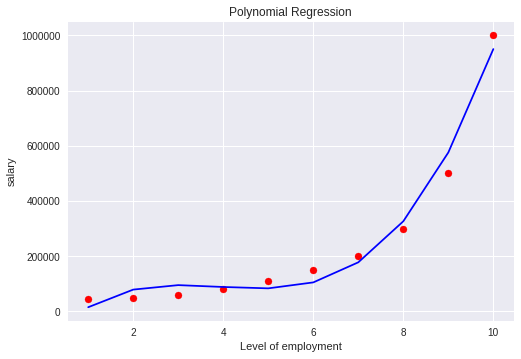

In [17]:
import matplotlib.pyplot as plt

plt.scatter(x , y , color = 'red')
plt.plot(x , regressor.predict(x_poly) , color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Level of employment')
plt.ylabel('salary')
plt.show()

***This is the best fit for our dataset***

# ***Making predictions***

In [21]:
predictions = regressor.predict(poly_features.fit_transform(9.8))

print(predictions)

[864290.81585082]


**Salary of level 9 is 5L and level 10 is 10L. Hence, we can say the predicted salary of level 9.5 is around 8L which is correctly predicted. **